In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
columns_with_missing_values=df.columns[df.isnull().any()]

In [7]:
columns_with_missing_values

Index([u'LotFrontage', u'Alley', u'MasVnrType', u'MasVnrArea', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2',
       u'Electrical', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish', u'GarageQual', u'GarageCond', u'PoolQC', u'Fence',
       u'MiscFeature'],
      dtype='object')

In [8]:
df[columns_with_missing_values].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
housepricesdata=df.copy()

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
labels=[]

In [12]:
valuecount=[]


In [13]:
   percentcount = []


In [14]:
for col in columns_with_missing_values:
    labels.append(col)
    valuecount.append(housepricesdata[col].isnull().sum())
    percentcount.append(float(housepricesdata[col].isnull().sum())/(housepricesdata.shape[0]))

In [15]:
ind = np.arange(len(labels))


In [16]:
percentcount

[0.1773972602739726,
 0.9376712328767123,
 0.005479452054794521,
 0.005479452054794521,
 0.025342465753424658,
 0.025342465753424658,
 0.026027397260273973,
 0.025342465753424658,
 0.026027397260273973,
 0.0006849315068493151,
 0.4726027397260274,
 0.05547945205479452,
 0.05547945205479452,
 0.05547945205479452,
 0.05547945205479452,
 0.05547945205479452,
 0.9952054794520548,
 0.8075342465753425,
 0.963013698630137]

Text(0.5,1,'Variables with missing values')

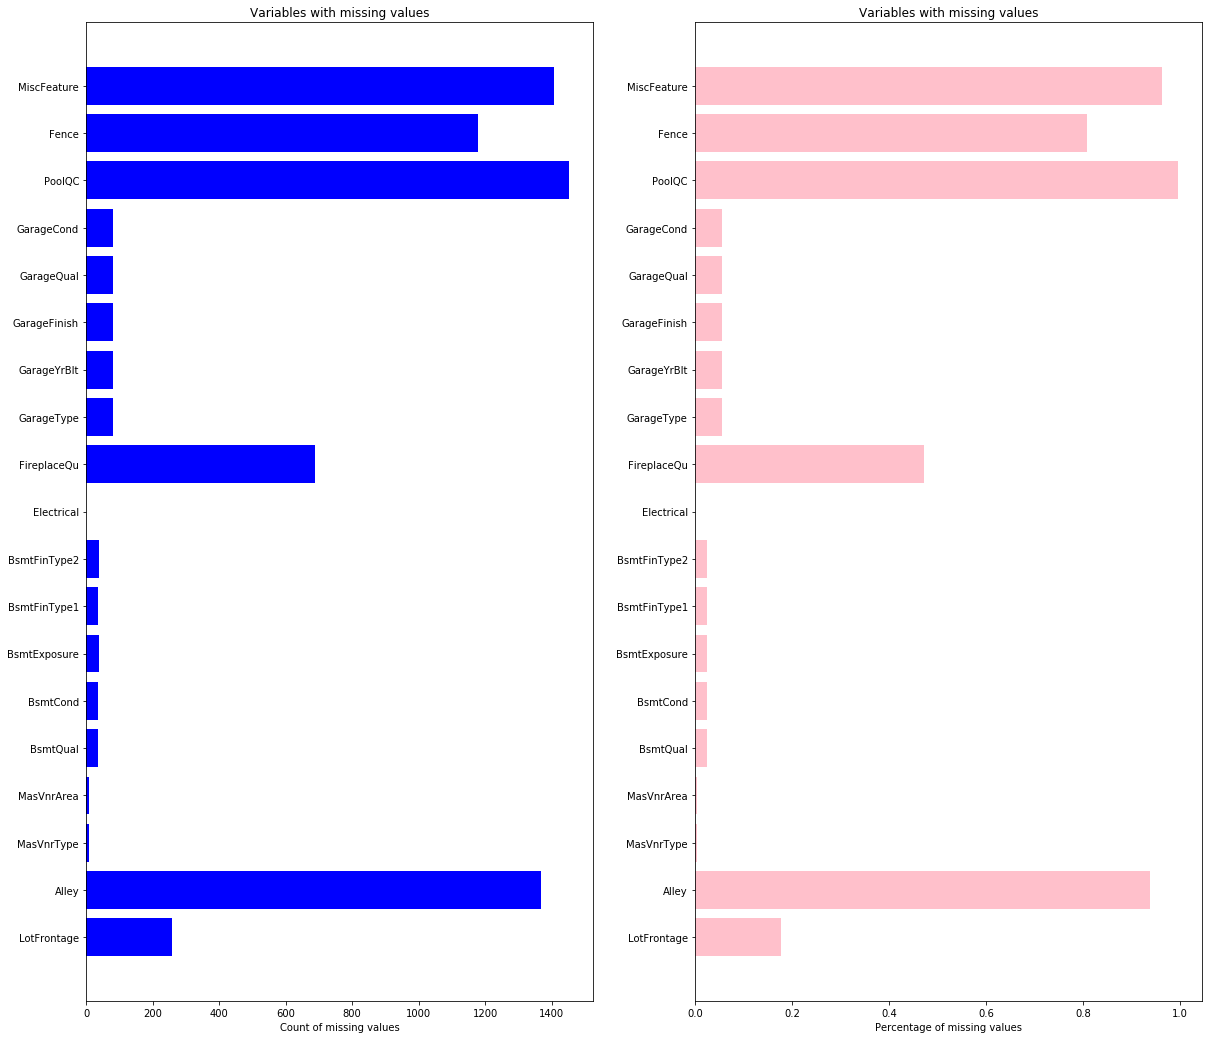

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,18))
rects = ax1.barh(ind, np.array(valuecount), color='blue')
ax1.set_yticks(ind)
ax1.set_yticklabels(labels, rotation='horizontal')
ax1.set_xlabel("Count of missing values")
ax1.set_title("Variables with missing values")
                
rects = ax2.barh(ind, np.array(percentcount), color='pink')
ax2.set_yticks(ind)
ax2.set_yticklabels(labels, rotation='horizontal')
ax2.set_xlabel("Percentage of missing values")
ax2.set_title("Variables with missing values")




In [18]:
import seaborn as sns

In [19]:
plt.figure(figsize=(30,20))


<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

In [20]:
    
                             
           # cubehelix palette is a part of seaborn that produces a colormap


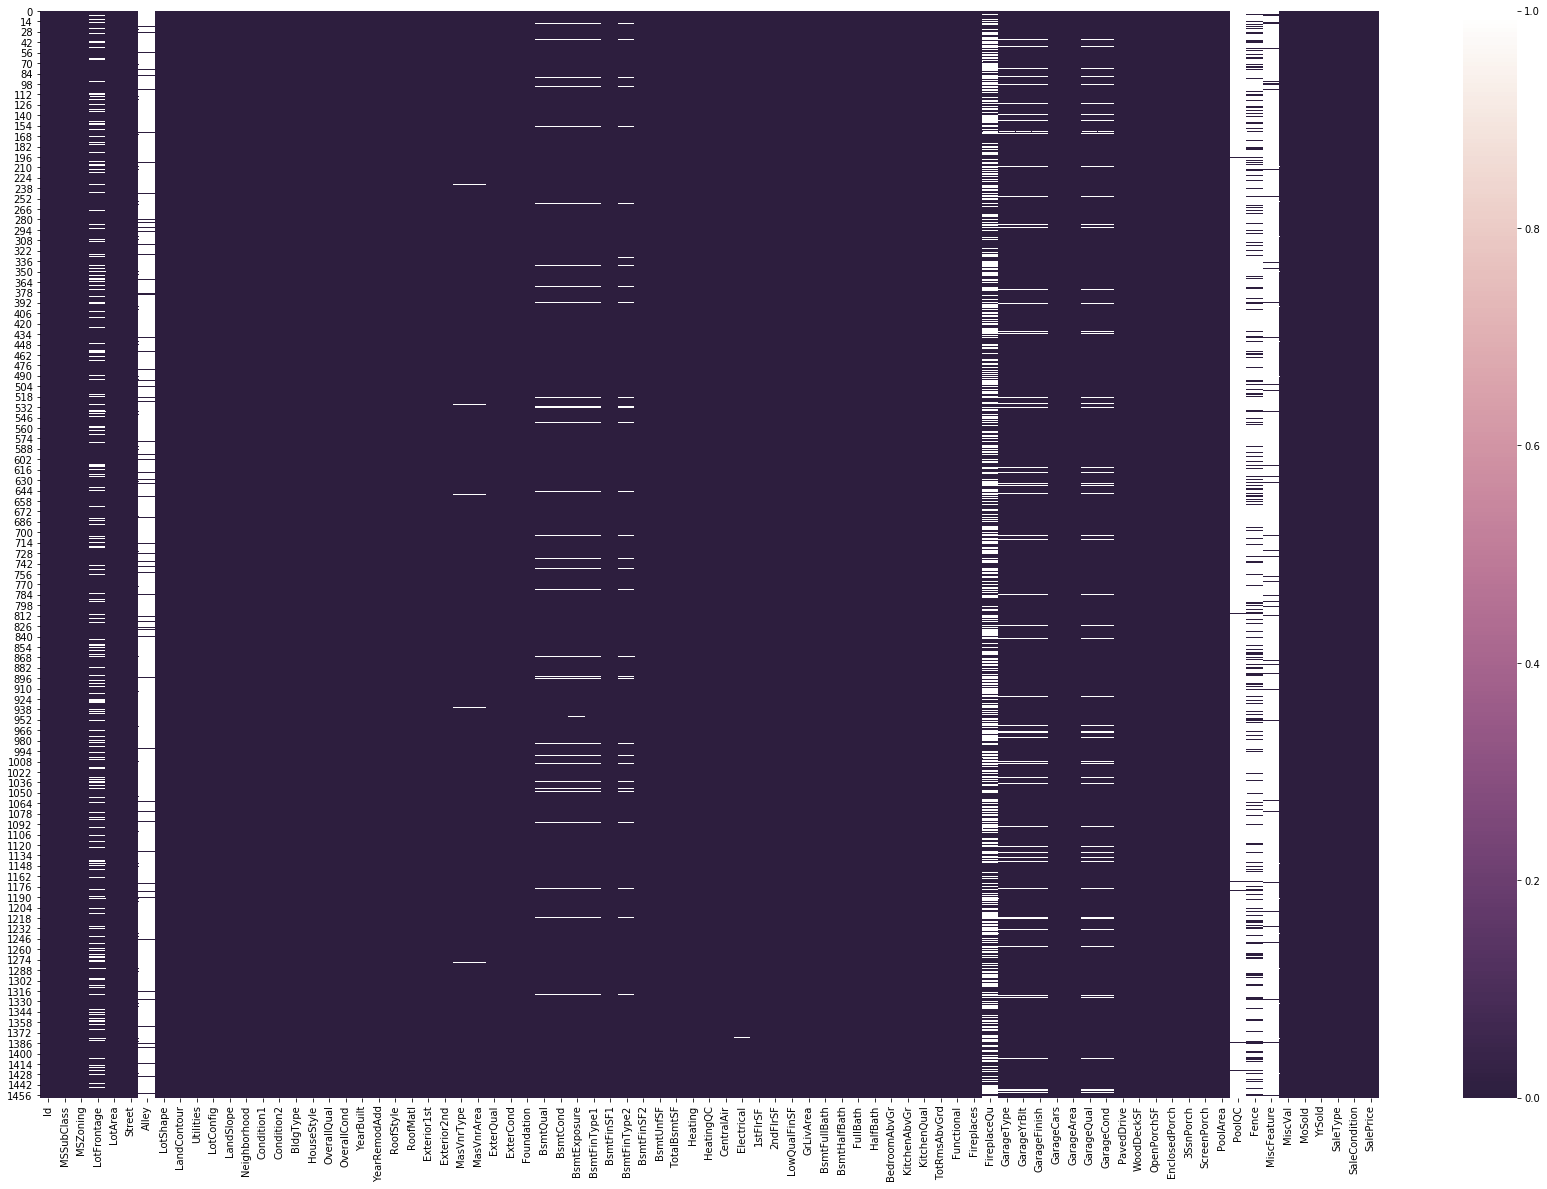

In [21]:
plt.figure(figsize=(30,20))

cmap=sns.cubehelix_palette(light=1,as_cmap=True,reverse=True)
sns.heatmap(housepricesdata.isnull(),cmap=cmap)
plt.show()

In [22]:
# Replacing missing values with 'No Access' in Alley variable
housepricesdata['Alley'].fillna('No Access', inplace=True)



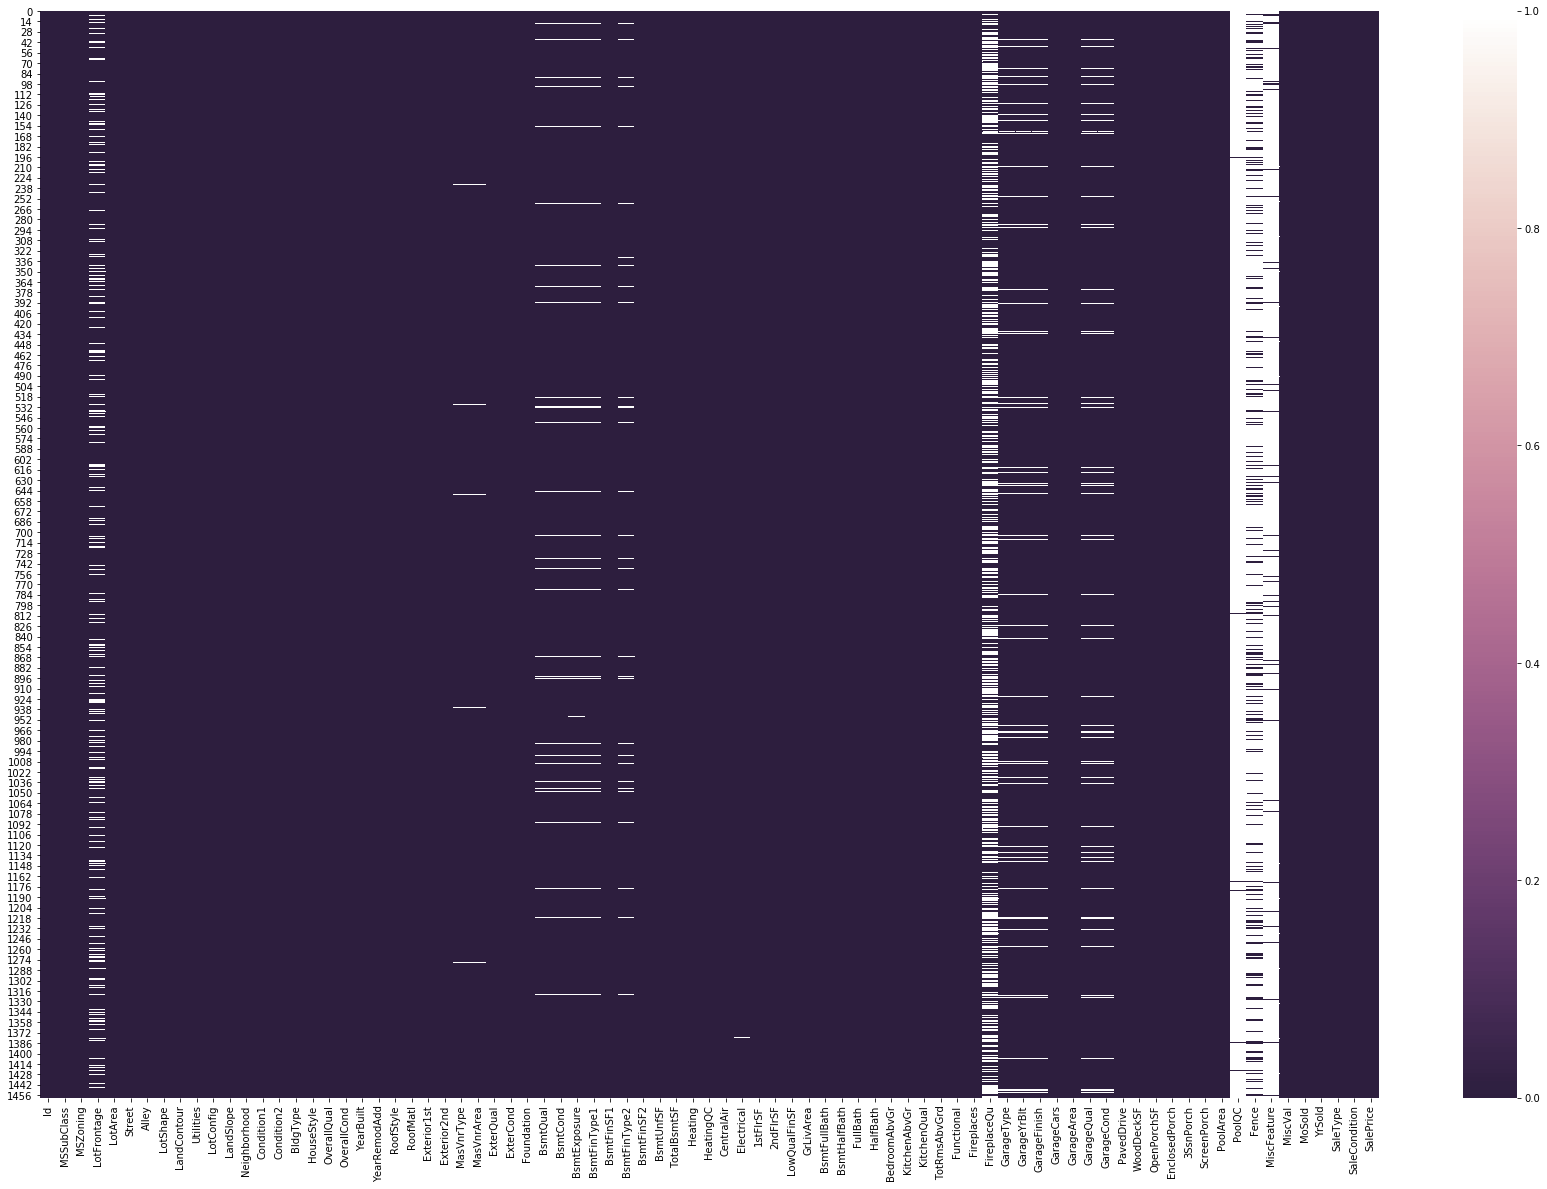

In [23]:
plt.figure(figsize=(30,20))

cmap=sns.cubehelix_palette(light=1,as_cmap=True,reverse=True)
sns.heatmap(housepricesdata.isnull(),cmap=cmap)
plt.show()

In [24]:
# Filling in the missing values in LotFrontage with its median value
housepricesdata['LotFrontage'].fillna(housepricesdata['LotFrontage'].median(), inplace=True)


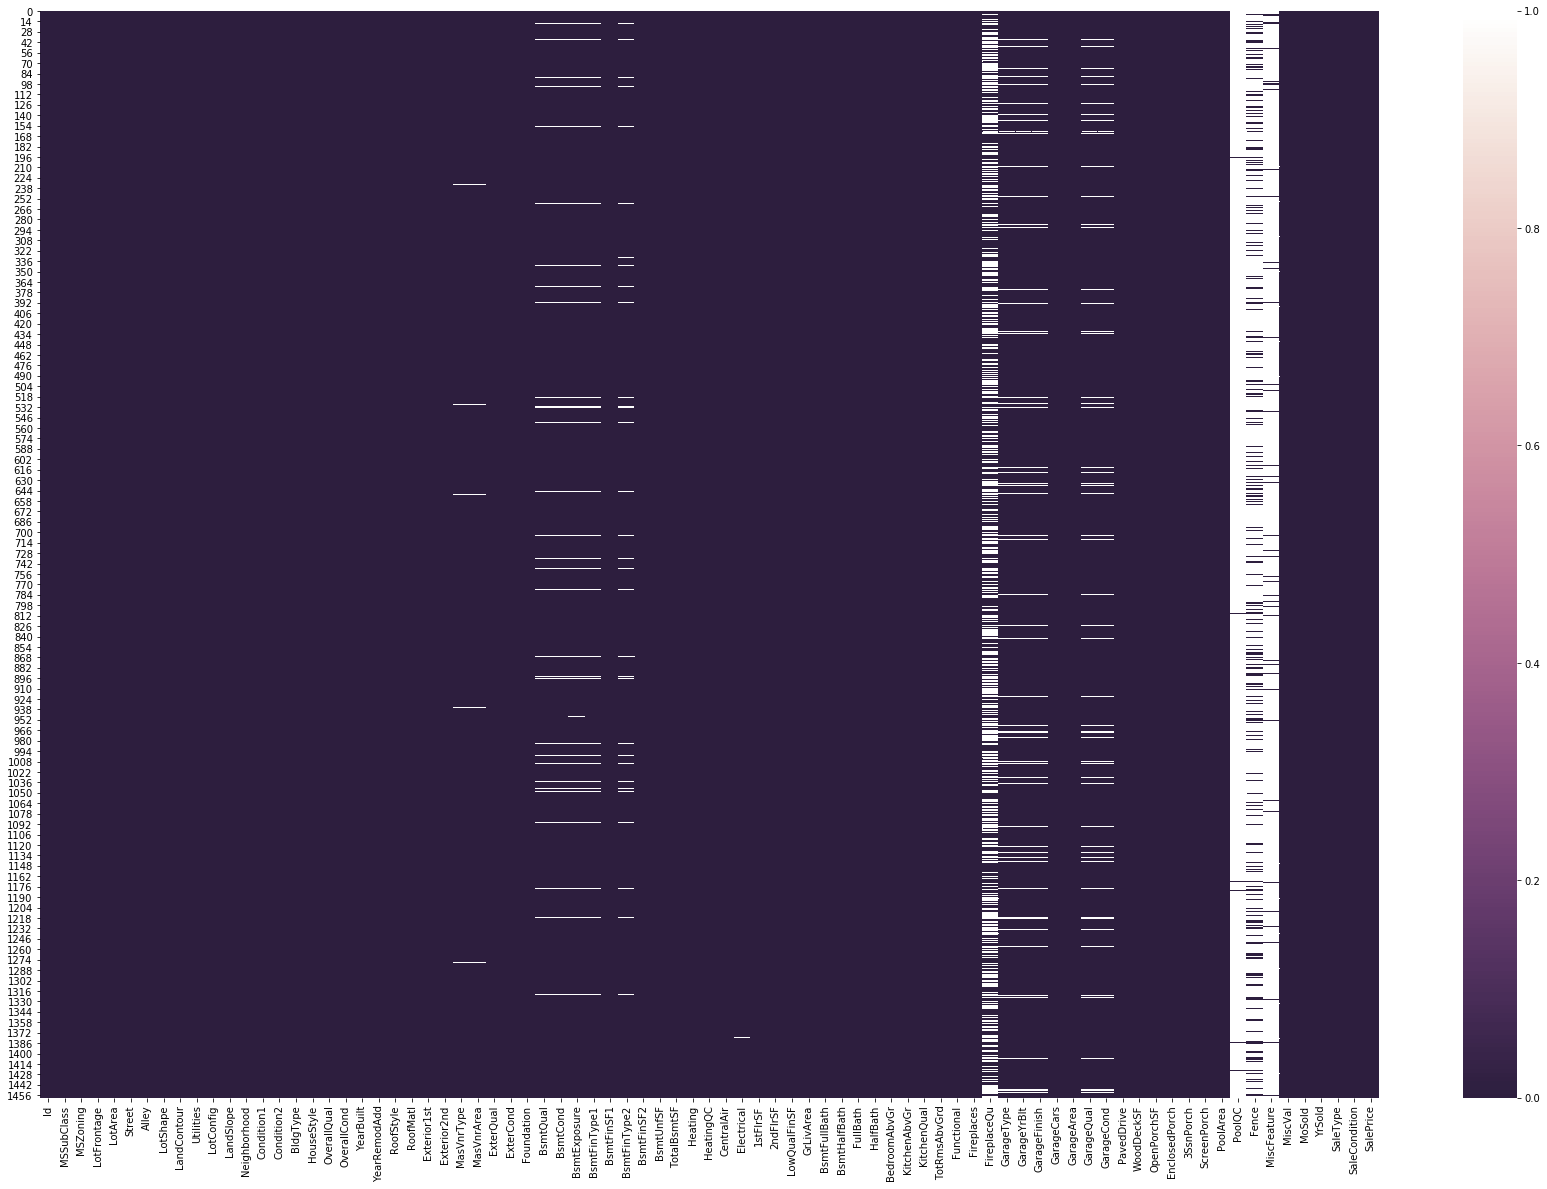

In [25]:
plt.figure(figsize=(30,20))

cmap=sns.cubehelix_palette(light=1,as_cmap=True,reverse=True)
sns.heatmap(housepricesdata.isnull(),cmap=cmap)
plt.show()

In [26]:
# Replacing all NA values with their original meaning
housepricesdata['BsmtQual'].fillna('No Basement', inplace=True)


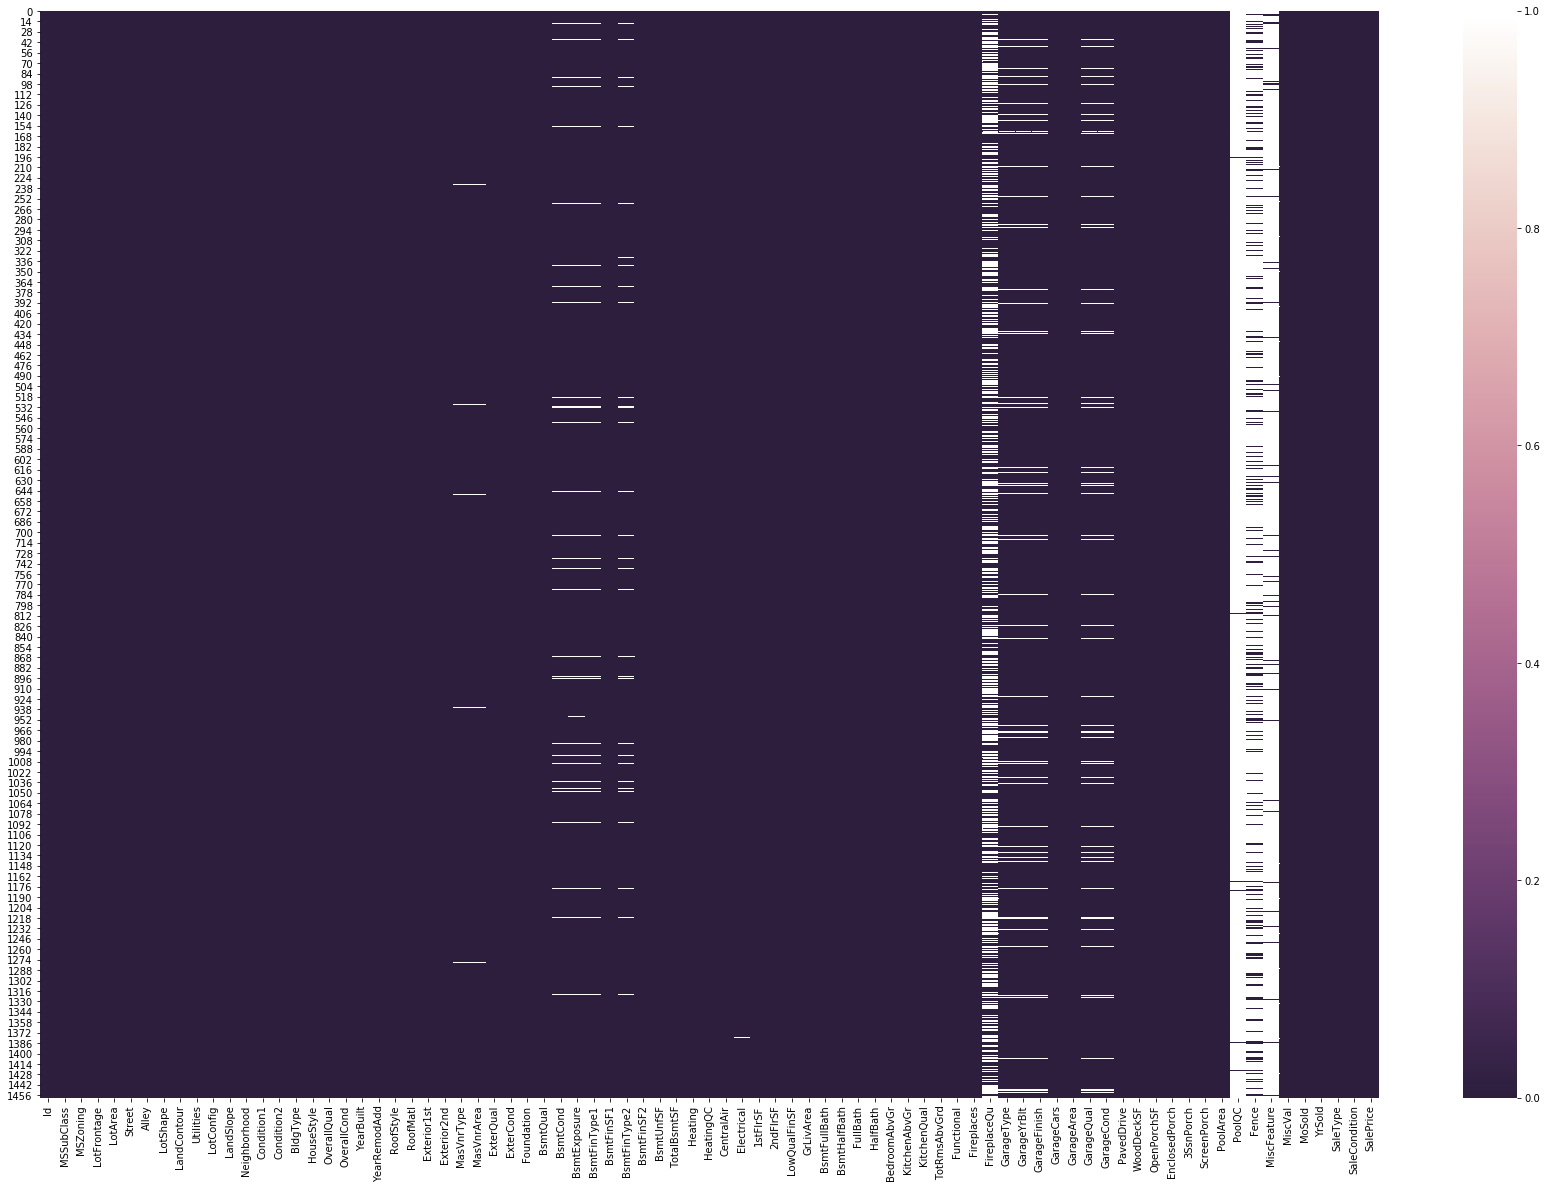

In [27]:
plt.figure(figsize=(30,20))

cmap=sns.cubehelix_palette(light=1,as_cmap=True,reverse=True)
sns.heatmap(housepricesdata.isnull(),cmap=cmap)
plt.show()

In [28]:
housepricesdata['BsmtCond'].fillna('No Basement', inplace=True)


In [29]:
housepricesdata['BsmtExposure'].fillna('No Basement', inplace=True)
housepricesdata['BsmtFinType1'].fillna('No Basement', inplace=True)
housepricesdata['BsmtFinType2'].fillna('No Basement', inplace=True)
housepricesdata['GarageYrBlt'].fillna(0, inplace=True)


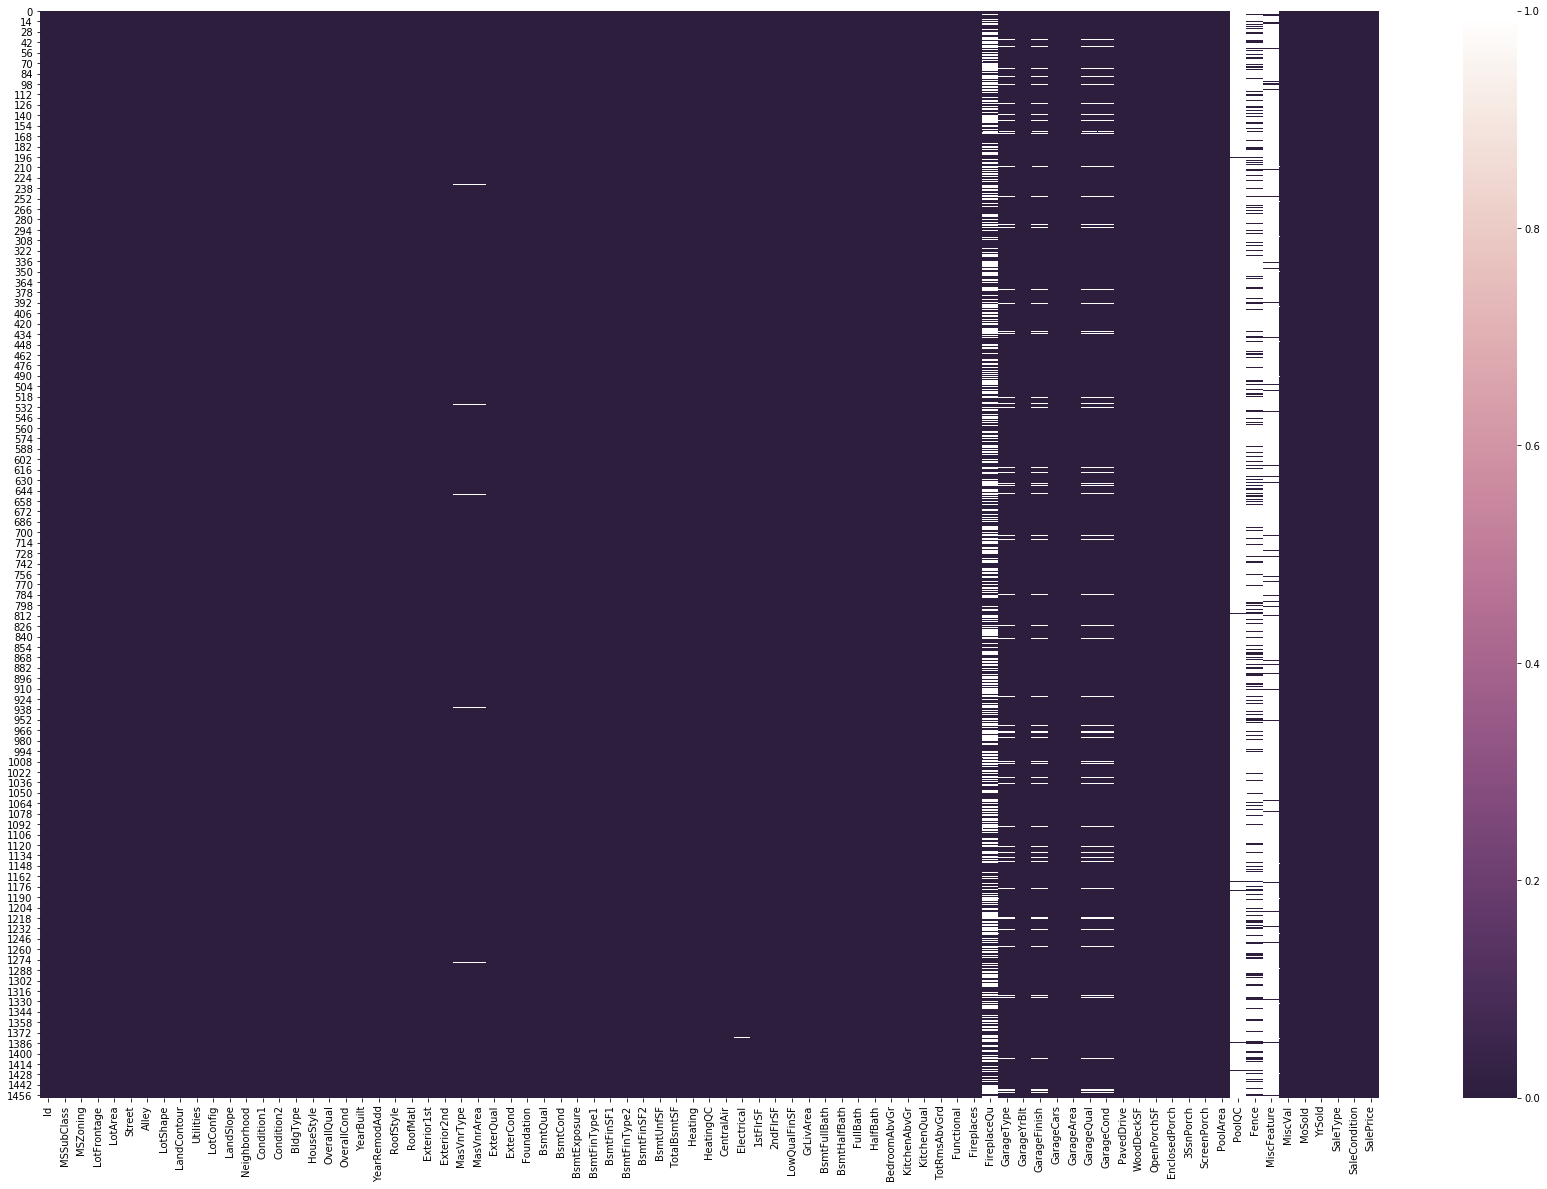

In [30]:
plt.figure(figsize=(30,20))

cmap=sns.cubehelix_palette(light=1,as_cmap=True,reverse=True)
sns.heatmap(housepricesdata.isnull(),cmap=cmap)
plt.show()

In [31]:
# For observations where GarageType is null, we replace null values in GarageYrBlt=0


In [32]:
housepricesdata['GarageType'].fillna('No Garage', inplace=True)
housepricesdata['GarageFinish'].fillna('No Garage', inplace=True)
     
housepricesdata['GarageQual'].fillna('No Garage', inplace=True)
housepricesdata['GarageCond'].fillna('No Garage', inplace=True)
housepricesdata['PoolQC'].fillna('No Pool', inplace=True)
housepricesdata['Fence'].fillna('No Fence', inplace=True)
housepricesdata['MiscFeature'].fillna('None', inplace=True)
housepricesdata['FireplaceQu'].fillna('No Fireplace', inplace=True)


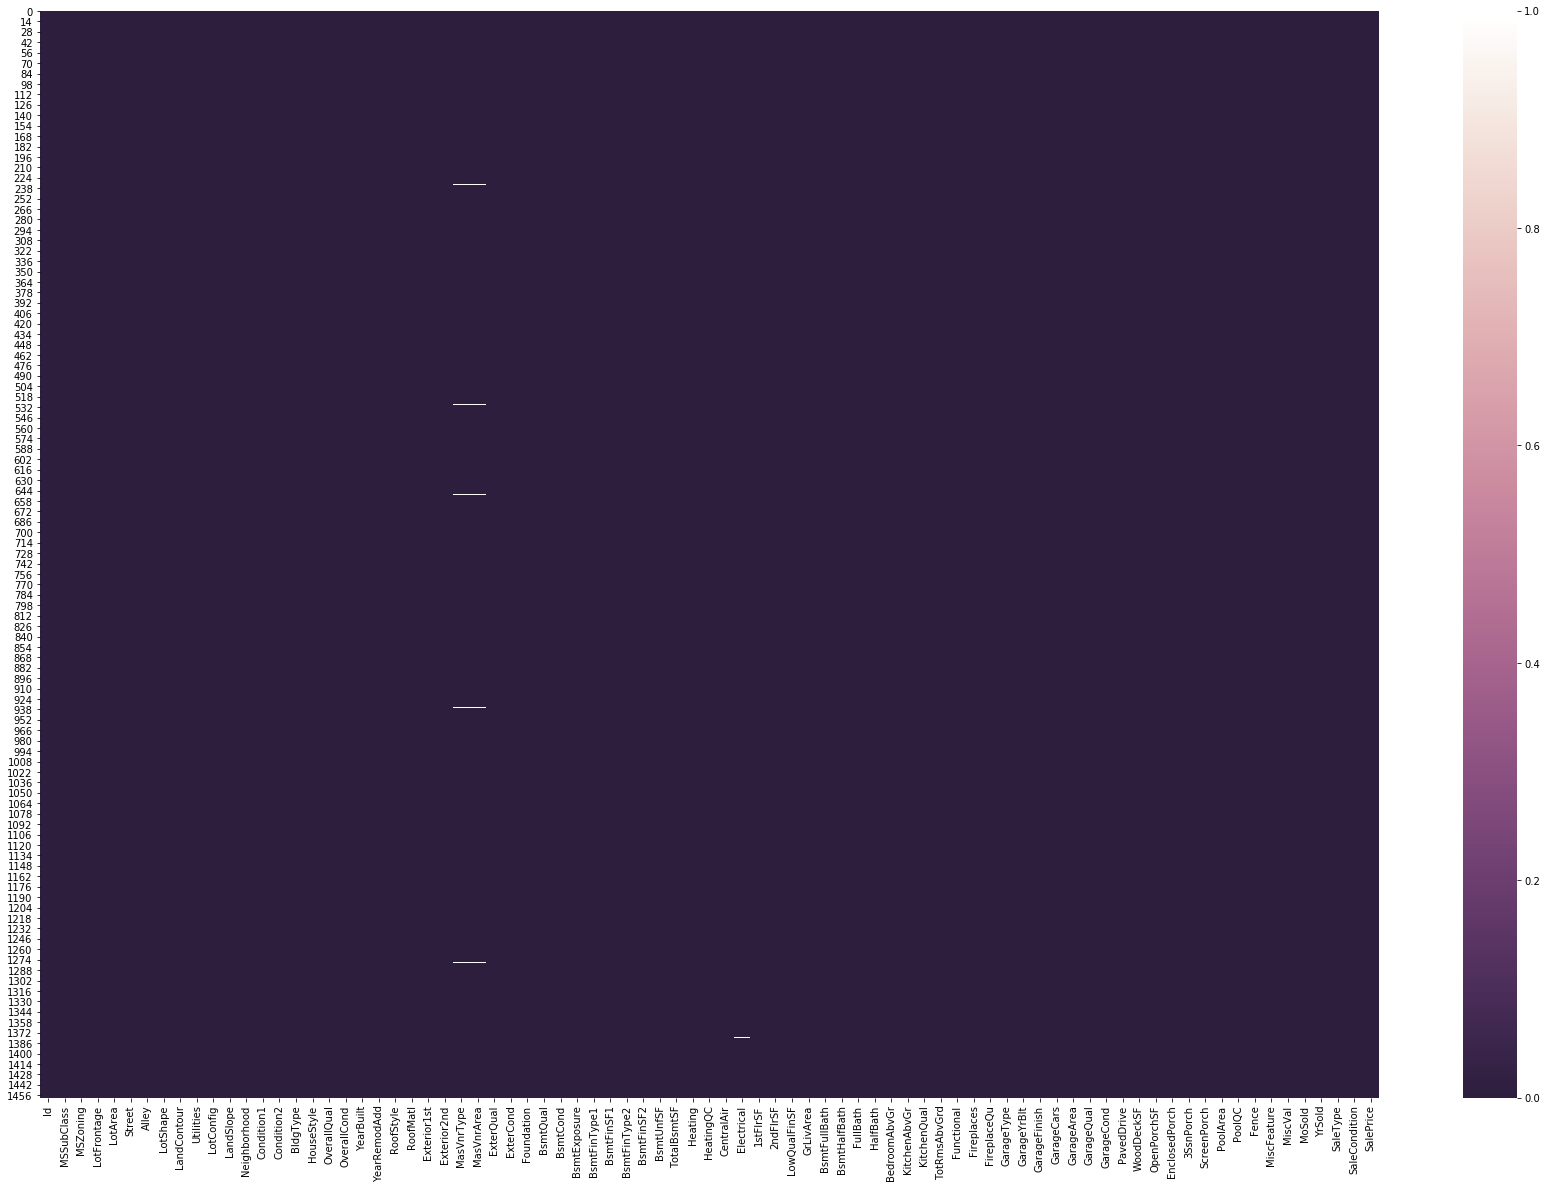

In [33]:
plt.figure(figsize=(30,20))

cmap=sns.cubehelix_palette(light=1,as_cmap=True,reverse=True)
sns.heatmap(housepricesdata.isnull(),cmap=cmap)
plt.show()

In [34]:
print(pd.crosstab(index=housepricesdata["MasVnrType"],\
columns=housepricesdata["MasVnrArea"], dropna=False, margins=True))

                
            
        



MasVnrArea  0.0  1.0  11.0  14.0  16.0  18.0  22.0  24.0  27.0  28.0  ...  \
MasVnrType                                                            ...   
BrkCmn        0    0     0     0     0     0     0     0     0     0  ...   
BrkFace       1    0     1     1     6     2     1     0     1     1  ...   
None        859    2     0     0     0     0     0     0     0     0  ...   
Stone         1    0     0     0     1     0     0     1     0     0  ...   
All         861    2     1     1     7     2     1     1     1     1  ...   

MasVnrArea  922.0  975.0  1031.0  1047.0  1115.0  1129.0  1170.0  1378.0  \
MasVnrType                                                                 
BrkCmn          0      0       0       0       0       0       0       0   
BrkFace         1      1       1       1       1       1       1       1   
None            0      0       0       0       0       0       0       0   
Stone           0      0       0       0       0       0       0       0   
All 

In [35]:
housepricesdata[['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
0,BrkFace,196.0
1,None,0.0
2,BrkFace,162.0
3,None,0.0
4,BrkFace,350.0
5,None,0.0
6,Stone,186.0
7,Stone,240.0
8,None,0.0
9,None,0.0


In [36]:
#Since they are area which is none type and zero area so make it all NA none and zero area
housepricesdata['MasVnrType'].fillna('None', inplace=True)
housepricesdata['MasVnrArea'].fillna(0, inplace=True)


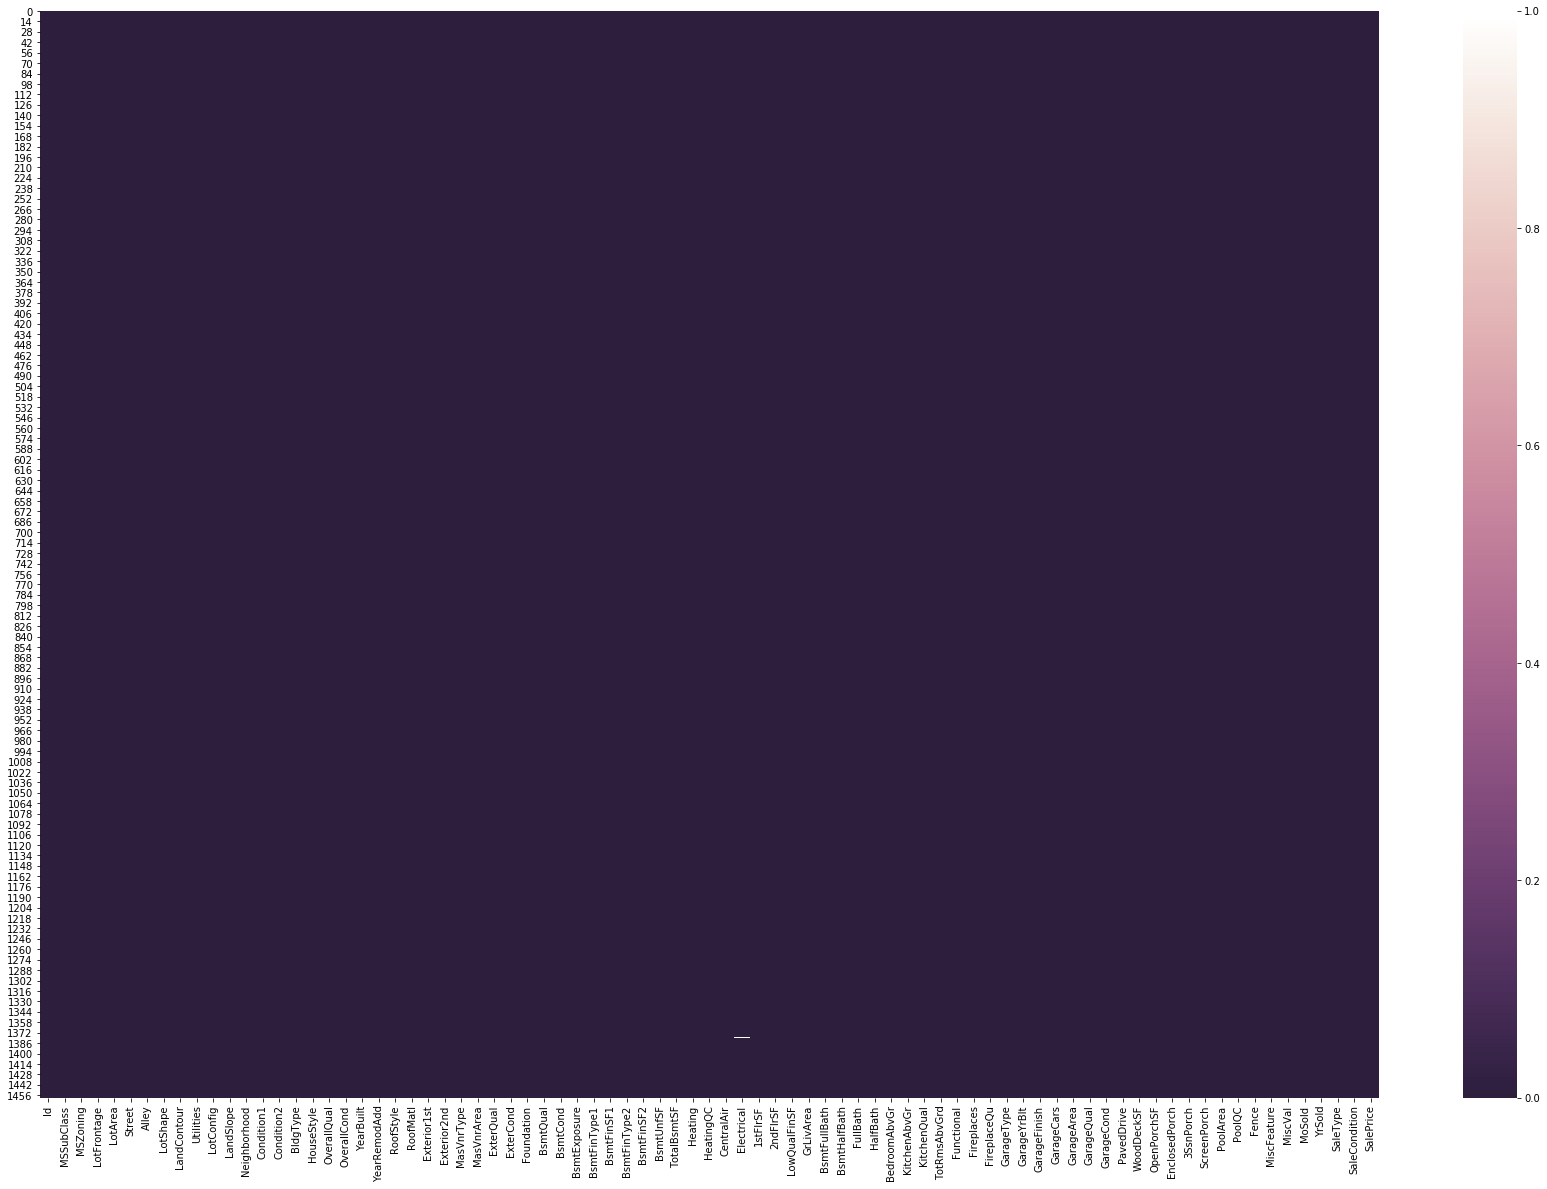

In [37]:
plt.figure(figsize=(30,20))

cmap=sns.cubehelix_palette(light=1,as_cmap=True,reverse=True)
sns.heatmap(housepricesdata.isnull(),cmap=cmap)
plt.show()

In [38]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [39]:
housepricesdata['MSSubClass'][housepricesdata['Electrical'].isnull()]


1379    80
Name: MSSubClass, dtype: int64

In [40]:
# Using crosstab to generate the count of Electrical Type by #MSSubClass
print(pd.crosstab(index=housepricesdata["Electrical"],
columns=housepricesdata['MSSubClass'], dropna=False, margins=True))
#for MSSubClass with 80 

MSSubClass   20  30  40  45   50   60  70  75  80  85  90  120  160  180  190  \
Electrical                                                                      
FuseA        31  18   2   3   20    0   8   2   0   0   5    0    0    0    5   
FuseF         5   4   0   2    8    0   2   0   1   0   4    0    0    0    1   
FuseP         0   1   0   0    0    0   0   0   0   0   1    0    0    0    1   
Mix           0   1   0   0    0    0   0   0   0   0   0    0    0    0    0   
SBrkr       500  45   2   7  116  299  50  14  56  20  42   87   63   10   23   
All         536  69   4  12  144  299  60  16  58  20  52   87   63   10   30   

MSSubClass   All  
Electrical        
FuseA         94  
FuseF         27  
FuseP          3  
Mix            1  
SBrkr       1334  
All         1460  


In [41]:
housepricesdata['Electrical'].fillna('SBrkr',inplace=True)

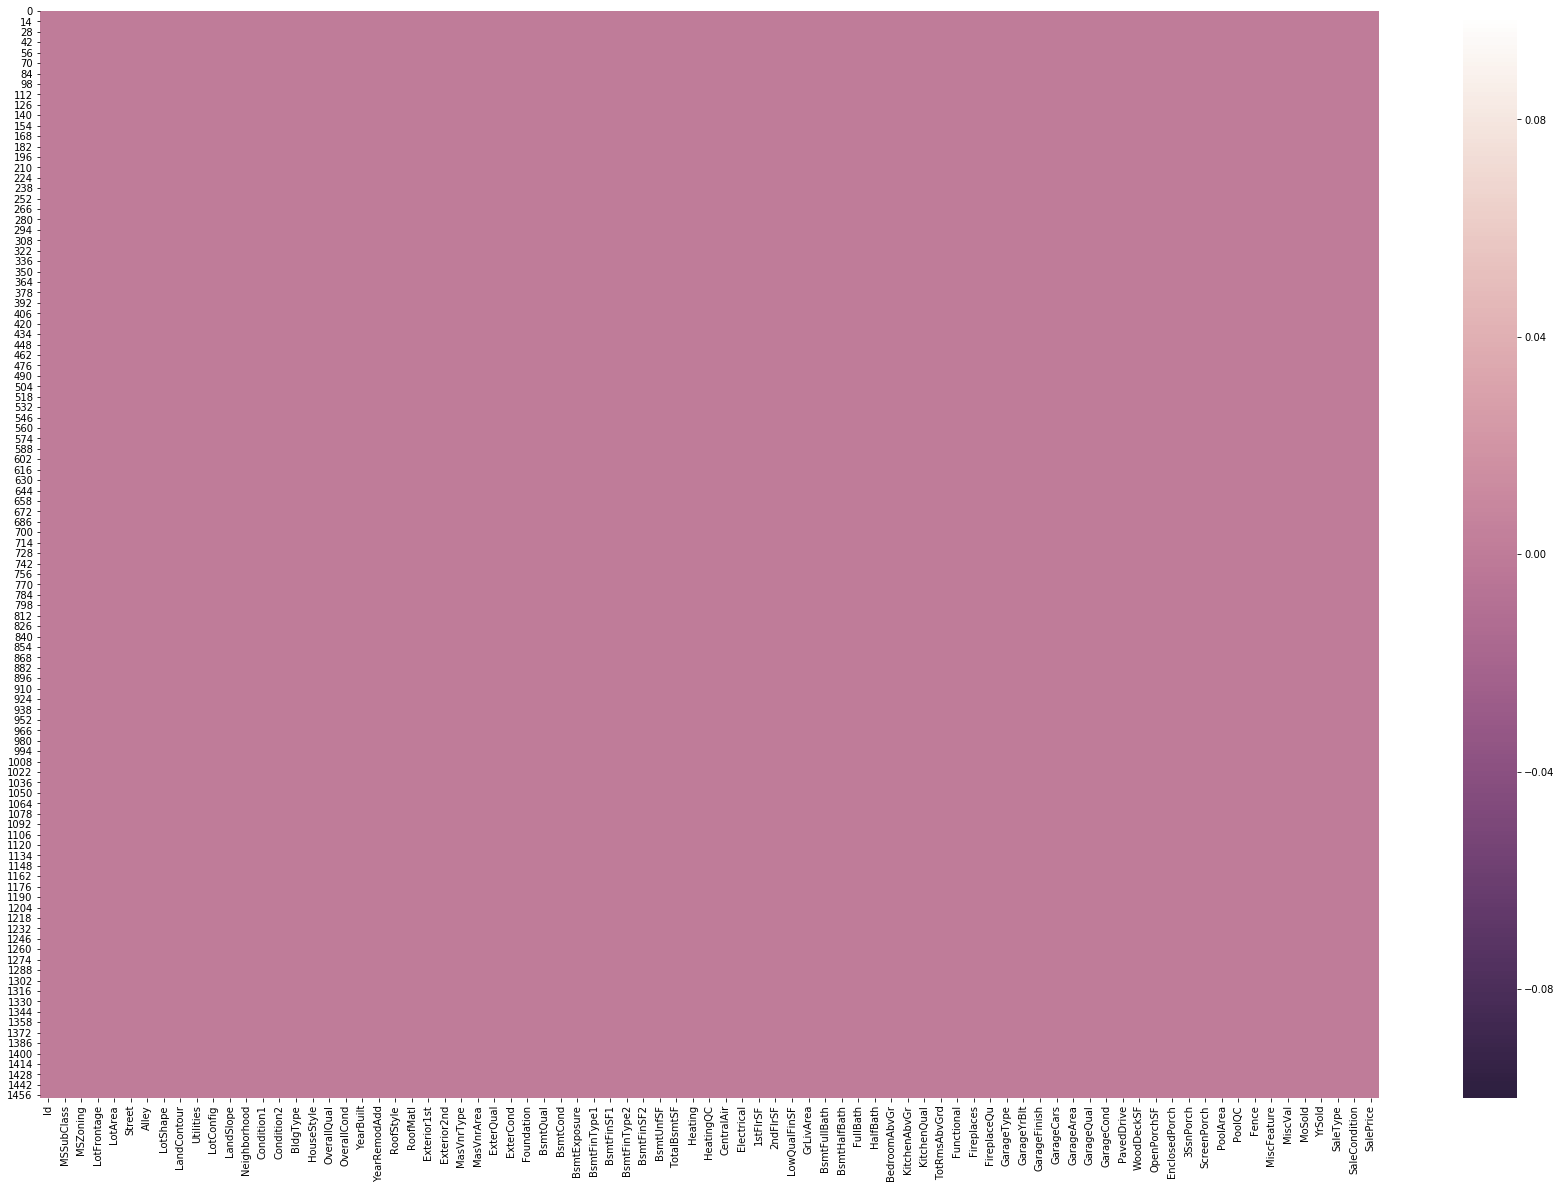

In [42]:
plt.figure(figsize=(30,20))

cmap=sns.cubehelix_palette(light=1,as_cmap=True,reverse=True)
sns.heatmap(housepricesdata.isnull(),cmap=cmap)
plt.show()

In [43]:
housepricesdata['MSSubClass'].dtype

dtype('int64')

In [44]:
housepricesdata

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No Access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No Access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No Access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No Access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No Access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,No Access,IR1,Lvl,AllPub,...,0,No Pool,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,No Access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,8,2007,WD,Normal,307000
7,8,60,RL,69.0,10382,Pave,No Access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,No Access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,No Access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,1,2008,WD,Normal,118000


In [45]:
pd.options.display.max_columns=None

In [46]:
pd.options.display.max_rows=None


In [47]:
housepricesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

In [48]:
housepricesdata['MSSubClass']=housepricesdata['MSSubClass'].astype('object')

In [49]:
housepricesdata['MSSubClass'].dtype

dtype('O')

In [67]:
housepricesdata['OverallQual']=housepricesdata['OverallQual'].astype('object')

In [68]:
housepricesdata['OverallCond']=housepricesdata['OverallCond'].astype('object')

In [50]:
df12=housepricesdata.copy()

In [51]:
df1=df12.select_dtypes(exclude=['O'])

In [52]:
df1.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [53]:
df1.drop(columns={'Id'},inplace=True)

/opt/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [54]:
df1.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [55]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm
%matplotlib inline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [56]:
from sklearn.model_selection import train_test_split
X=df1.drop(columns={'SalePrice'})
y=df1['SalePrice']

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=1)


In [58]:
import statsmodels.api as sm
X_constant=sm.add_constant(X)
model=sm.OLS(y,X_constant).fit()
model.summary()

/opt/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     185.4
Date:                Thu, 05 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:49:27   Log-Likelihood:                -17328.
No. Observations:                1460   AIC:                         3.472e+04
Df Residuals:                    1426   BIC:                         3.490e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9.884e+04   1.42e+06      0.070      0.945   -2.69e+06    2.88e+06
LotFrontage      30.1515     49.409      0.610      0.542     -66.770     127.073
LotArea           0.4388      0.103      4.280      0.000       0.238       0.640
OverallQual     1.66e+04   1187.542     13.981      0.000    1.43e+04    1.89e+04
OverallCond    5366.3821   1034.553      5.187      0.000    3336.974    7395.791
YearBuilt       325.5167     61.278      5.312      0.000     205.312     445.721
YearRemodAdd    121.4629     66.896      1.816      0.070      -9.761     252.687
MasVnrArea       26.3392      5.984      4.402      0.000      14.601      38.077
BsmtFinSF1        9.9116      2.544      3.896      0.000       4.920      14.903
BsmtFinSF2        0.4066      4.536      0.090      0.929      -8.491       9.304
BsmtUnfSF         0.1728      2.424      0.071      0.943      -4.582       4.928
TotalBsmtSF      10.4910      3.379      3.105      0.002       3.863      17.119
1stFlrSF         23.8095      6.106      3.899      0.000      11.832      35.787
2ndFlrSF         17.2107      5.706      3.016      0.003       6.018      28.403
LowQualFinSF    -16.7441     14.864     -1.127      0.260     -45.901      12.413
GrLivArea        24.2762      5.676      4.277      0.000      13.143      35.410
BsmtFullBath   6985.2169   2622.184      2.664      0.008    1841.464    1.21e+04
BsmtHalfBath    151.3935   4104.727      0.037      0.971   -7900.558    8203.345
FullBath       2001.2902   2842.329      0.704      0.481   -3574.305    7576.885
HalfBath      -1776.1940   2677.315     -0.663      0.507   -7028.093    3475.705
BedroomAbvGr  -8901.5957   1699.684     -5.237      0.000   -1.22e+04   -5567.446
KitchenAbvGr  -2.726e+04   4925.261     -5.535      0.000   -3.69e+04   -1.76e+04
TotRmsAbvGrd   5860.2777   1236.562      4.739      0.000    3434.601    8285.954
Fireplaces     3876.8934   1776.826      2.182      0.029     391.421    7362.366
GarageYrBlt     -14.5487      2.720     -5.348      0.000     -19.885      -9.212
GarageCars     1.538e+04   3014.732      5.101      0.000    9464.711    2.13e+04
GarageArea        9.7383      9.855      0.988      0.323      -9.593      29.070
WoodDeckSF       25.2424      8.027      3.145      0.002       9.496      40.989
OpenPorchSF      -4.6110     15.261     -0.302      0.763     -34.547      25.325
EnclosedPorch    13.7348     16.955      0.810      0.418     -19.525      46.995
3SsnPorch        26.0390     31.564      0.825      0.410     -35.878      87.956
ScreenPorch      56.9570     17.283      3.295      0.001      23.053      90.861
PoolArea        -36.9649     23.890     -1.547      0.122     -83.829       9.899
MiscVal          -0.2191      1.865     -0.118      0.906      -3.877       3.439
MoSold           41.3190    346.367      0.119   

In [59]:
model.pvalues['LotFrontage']

0.5417967028029476

In [61]:
p_columns=[]

In [62]:
for col in X.columns:
    p_value=model.pvalues[col]
    if p_value<0.05:
        p_columns.append(col)

In [63]:
p_columns

['LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch']

In [66]:
lin_reg=LinearRegression()
model=lin_reg.fit(X_train,y_train)
print('R^2 for train: ',model.score(X_train,y_train))
print('R^2 for test: ',model.score(X_test,y_test))


('R^2 for train: ', 0.8023615191304324)
('R^2 for test: ', 0.8681636008107321)


In [67]:
Y_pred=model.predict(X_test)

In [68]:
from sklearn import metrics
print('rmse :',np.sqrt(metrics.mean_squared_error(Y_pred,y_test)))

('rmse :', 31497.772558286862)


In [70]:
X=df1[p_columns]
y=df1['SalePrice']

In [71]:
import statsmodels.api as sm
X_constant=sm.add_constant(X)
model=sm.OLS(y,X_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     322.2
Date:                Thu, 05 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:49:58   Log-Likelihood:                -17333.
No. Observations:                1460   AIC:                         3.471e+04
Df Residuals:                    1440   BIC:                         3.481e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.647e+05   9.03e+04     -8.467      0.000   -9.42e+05   -5.88e+05
LotArea          0.4504      0.100      4.501      0.000       0.254       0.647
OverallQual   1.718e+04   1151.989     14.910      0.000    1.49e+04    1.94e+04
OverallCond   6064.1778    930.143      6.520      0.000    4239.598    7888.757
YearBuilt      362.5701     45.720      7.930      0.000     272.885     452.255
MasVnrArea      25.3405      5.871      4.316      0.000      13.823      36.858
BsmtFinSF1       8.9206      3.048      2.927      0.003       2.943      14.899
TotalBsmtSF     10.4919      4.137      2.536      0.011       2.378      18.606
1stFlrSF        42.2517     20.187      2.093      0.037       2.653      81.850
2ndFlrSF        32.9667     19.826      1.663      0.097      -5.924      71.857
GrLivArea        8.6376     19.709      0.438      0.661     -30.024      47.300
BsmtFullBath  7050.9137   2371.440      2.973      0.003    2399.067    1.17e+04
BedroomAbvGr -9150.4942   1636.792     -5.591      0.000   -1.24e+04   -5939.742
KitchenAbvGr -2.745e+04   4791.763     -5.730      0.000   -3.69e+04   -1.81e+04
TotRmsAbvGrd  6024.7891   1221.628      4.932      0.000    3628.429    8421.149
Fireplaces    3136.6320   1739.498      1.803      0.072    -275.588    6548.853
GarageYrBlt    -15.2718      2.637     -5.791      0.000     -20.445     -10.099
GarageCars    1.844e+04   2056.488      8.969      0.000    1.44e+04    2.25e+04
WoodDeckSF      23.8707      7.902      3.021      0.003       8.370      39.372
ScreenPorch     50.3840     16.937      2.975      0.003      17.160      83.608
==============================================================================
Omnibus:                      710.836   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           122171.013
Skew:                          -1.164   Prob(JB):                         0.00
Kurtosis:                      47.753   Cond. No.                     1.46e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=1)


In [73]:
lin_reg=LinearRegression()
model=lin_reg.fit(X_train,y_train)
print('R^2 for train: ',model.score(X_train,y_train))
print('R^2 for test: ',model.score(X_test,y_test))
Y_pred=model.predict(X_test)

('R^2 for train: ', 0.8008695759761119)
('R^2 for test: ', 0.8686246540179225)


In [74]:
from sklearn import metrics
print('rmse :',np.sqrt(metrics.mean_squared_error(Y_pred,y_test)))

('rmse :', 31442.647919066294)


In [112]:
df1.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [113]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
GarageYrBlt      1460 non-null float64

In [114]:
X=df1.drop(columns={'SalePrice'})
y=df1['SalePrice']

In [115]:
## Split the test train
# Test 30% nad train 70%

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=3)
print(len(X_test), len(y_test))

(146, 146)


In [116]:
#Laso

In [117]:
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [118]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [119]:
#split train and test
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=31)

In [120]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [121]:
print("training score:"), train_score 
print("test score: "), test_score
print("number of features used: "), coeff_used

training score: 0.8154946459555387
test score:  0.7951373565860805
number of features used:  35


In [122]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000000.0,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [123]:
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

In [124]:
print("training score for alpha=0.01:"), train_score001 
print("test score for alpha =0.01: "), test_score001
print("number of features used: for alpha =0.01:"), coeff_used001

training score for alpha=0.01: 0.8154946606735617
test score for alpha =0.01:  0.7951244135806601
number of features used: for alpha =0.01: 35


In [125]:
y_pred=lasso001.predict(X_test)

In [126]:
print('rmse for 0.01 :',np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

('rmse for 0.01 :', 37066.41848704455)


In [127]:
lasso00001 = Lasso(alpha=0.001, max_iter=10e5)
lasso00001.fit(X_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [128]:
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

In [129]:
print("training score for alpha=0.001:"), train_score00001 
print("test score for alpha =0.001: "), test_score00001
print("number of features used: for alpha =0.001:"), coeff_used00001

training score for alpha=0.001: 0.8154946606750189
test score for alpha =0.001:  0.7951242957932698
number of features used: for alpha =0.001: 35


In [130]:
y_pred=lasso00001.predict(X_test)

In [131]:
print('rmse for 0.001 :',np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

('rmse for 0.001 :', 37066.42914218446)


In [132]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [133]:
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

In [134]:
print("training score for alpha=0.0001:"), train_score00001 
print("test score for alpha =0.0001: "), test_score00001
print("number of features used: for alpha =0.0001:"), coeff_used00001

training score for alpha=0.0001: 0.8154946606750335
test score for alpha =0.0001:  0.7951242840143985
number of features used: for alpha =0.0001: 35


In [135]:
y_pred=lasso00001.predict(X_test)

In [136]:
print('rmse for 0.0001 :',np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

('rmse for 0.0001 :', 37066.43020771024)


In [146]:
lasso00001 = Lasso(alpha=10000, max_iter=10e5)
lasso00001.fit(X_train,y_train)

Lasso(alpha=10000, copy_X=True, fit_intercept=True, max_iter=1000000.0,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [147]:
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

In [180]:
X_train.shape

(1022, 19)

In [178]:
lasso00001.coef_.shape

(35,)

In [148]:
print("training score for alpha=0.0001:"), train_score00001 
print("test score for alpha =0.0001: "), test_score00001
print("number of features used: for alpha =0.0001:"), coeff_used00001

training score for alpha=0.0001: 0.7710688476853268
test score for alpha =0.0001:  0.7792984244008044
number of features used: for alpha =0.0001: 23


In [149]:
y_pred=lasso00001.predict(X_test)

In [151]:
print('rmse for 10000 :',np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

('rmse for 10000 :', 38471.42177525286)


In [137]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

In [138]:
print("LR training score:"), lr_train_score 
print("LR test score: "), lr_test_score

LR training score: 0.8154946606750335
LR test score:  0.7951242827056331


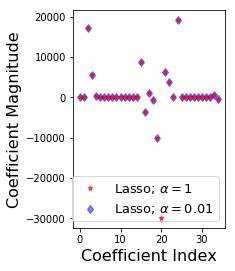

In [139]:
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)

In [152]:
#take significant and make ridge

In [153]:
p_columns

['LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch']

In [155]:
X=df1[p_columns]
y=df1['SalePrice']

In [156]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=31)

In [157]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [161]:
# higher the alpha value, more restriction on the coefficients; 
# low alpha > more generalization, coefficients are barely
rr = Ridge(alpha=0.01) 
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [162]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [163]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

In [164]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

In [166]:
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

In [167]:
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)

('linear regression train score:', 0.8139265782021377)
('linear regression test score:', 0.7970761264032404)
('ridge regression train score low alpha:', 0.8139265777509406)
('ridge regression test score low alpha:', 0.7970780116229297)
('ridge regression train score high alpha:', 0.8086217559068762)
('ridge regression test score high alpha:', 0.8010941839126254)


In [177]:
y_pred=rr100.predict(X_test)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

('RMSE:', 36522.39599365368)


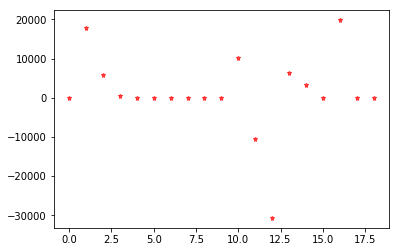

In [168]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers

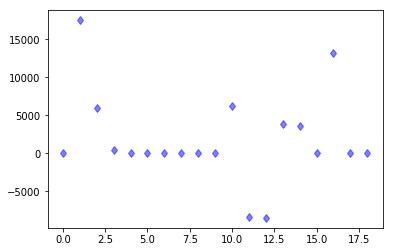

In [169]:
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency

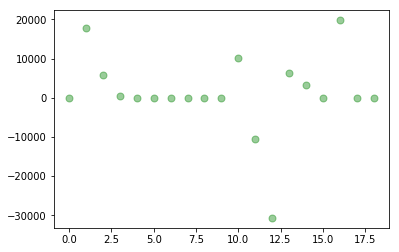

In [170]:
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

# Elastic Net regression

In [188]:
# Let's perform a cross-validation to find the best combination of alpha and l1_ratio
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')
#ll_ration to check random value if lambda and lambda1
#n_jobs=-1, it allows you to use all resources of laptop

In [189]:
cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1], max_iter=2000,
       n_alphas=100, n_jobs=-1, normalize=True, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0)

In [190]:
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 1.93584625
Optimal l1_ratio: 1.000
Number of iterations 465


In [191]:
# train model with best parameters from CV
model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
model.fit(X_train, y_train)

ElasticNet(alpha=1.9358462470726707, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=465, normalize=True, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [192]:
print(r2_score(y_train, model.predict(X_train))) # training data performance

0.8138883059066164


In [193]:
print(r2_score(y_test, model.predict(X_test))) # test data performance

0.797321743394672


In [194]:
print(np.sqrt(mean_squared_error( model.predict(X_test),y_test))) # RMSE

36867.11043151967
